### Overview - Part I

In the first part of the project (see the <<.py>> file for documentation), we took raw futures trading data (bids/asks/trades) and created an algorithm which can parametrically calculate (in parallel) the profitability of hundreds of thousands of trading strategies.  

A recap of the features:

| Feature | Type | Description |
| :-: | :-: | :-- |
| **Time Candle** | str | The time candle upon which we base the strategy. E.g. if a major trading event occurs at 9:00, we're examining the 9:00 candle |
| **Duration** | int | The duration of the candle, in minutes. E.g. the 10-minute 9 o'clock candle. |
| **Open-close Difference** | int | How much of a gain (or loss) the aforementioned candle needs to show in order for a trade to be executed |
| **Momentum Margin** | int | The buy price is the closing price plus this number, to ensure momentum (minus for short trading) |
| **Momentum Volume** | int | The number of contracts which must be traded at the aforementioned price before we buy/short on a given day. |
| **Desired Profit** | int | The profit required to exit the trade. |
| **Stop Loss** | int | The price which will trigger an exit for a loss. |
| **Units** | int | The number of units to be bought. |
| **Total Profit** | int | Target variable. |

We can now examine a dataframe which over 100,000 trading strategies which were executed based on the parameters above.

The first iteration of the code contains the following:
1. Importing data and libraries, basic ETL.
2. Some EDA - nothing fancy, since we've essentially engineered all of the features.
3. Grouping by the features, initial conclusions.
4. Some further grouping in order to substantiate said conclsions.

After   , improvements were made to the   in order  . If you're interested, scroll down to Part II.

### Imports and ETL:

In [1]:
import pandas as pd
import matplotlib

In [2]:
strategies = pd.read_csv("Strategies Results.csv")

When considering a good **metric** for the problem, "Total Profit" doens't work because it's absolute; the profit (or loss) is substantially higher when buying many contracts, but so is the initial investment. IRR could be a good possibility, but if you've got lots of money to spend and the ideal strategy only has you buying one contract, that's not helpful.
In the meantime, we'll take the simple approach - normalizing the total profit by the number of units.
Keep in mind that "Units" is still a valid feature - the number of units also determines how quickly the trade takes place. 

In [3]:
strategies["Profit Per Unit"] = strategies["Total Profit"] / strategies["Units"]
strategies = strategies.drop(['Unnamed: 0'], axis = 1)

In [4]:
strategies

,Unnamed: 0,Time Candle,Duration,Momentum Margin,Momentum Volume,Desired Profit,Stop Loss,Units,Open-close Difference,Total Profit,Profit Per Unit,Stop Loss Ratio
0,0,9:00,5,0,3,5,2.5,1,3,-68.0,-68.00,0.5
1,0,9:00,5,0,3,5,2.5,1,5,-65.0,-65.00,0.5
2,0,9:00,5,0,3,5,2.5,1,10,-49.0,-49.00,0.5
3,0,9:00,5,0,3,5,5.0,1,3,-81.0,-81.00,1.0
4,0,9:00,5,0,3,5,5.0,1,5,-76.0,-76.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
107131,0,14:20,15,10,5,35,35.0,50,12,8747.0,174.94,1.0
107132,0,14:20,15,10,5,35,35.0,50,15,8747.0,174.94,1.0
107133,0,14:20,15,10,5,35,70.0,50,7,9266.0,185.32,2.0
107134,0,14:20,15,10,5,35,70.0,50,12,15908.0,318.16,2.0


In [5]:
strategies.describe()

,Unnamed: 0,Duration,Momentum Margin,Momentum Volume,Desired Profit,Stop Loss,Units,Open-close Difference,Total Profit,Profit Per Unit,Stop Loss Ratio
count,107136.0,107136.000000,107136.000000,107136.000000,107136.000000,107136.000000,107136.000000,107136.000000,107136.000000,107136.000000,107136.000000
mean,0.0,10.000000,5.000000,4.000000,15.967742,18.629032,15.981855,7.032258,-574.605203,-37.404580,1.166667
std,0.0,4.082502,3.546937,1.000005,8.271575,14.794885,14.769728,3.679228,1888.822495,80.119894,0.623612
min,0.0,5.000000,0.000000,3.000000,5.000000,2.500000,1.000000,3.000000,-23414.000000,-672.000000,0.500000
25%,0.0,5.000000,3.000000,3.000000,10.000000,7.500000,5.000000,3.000000,-1047.000000,-76.600000,0.500000
50%,0.0,10.000000,5.000000,4.000000,15.000000,12.500000,9.000000,5.000000,-325.000000,-46.000000,1.000000
75%,0.0,15.000000,7.000000,5.000000,25.000000,25.000000,25.000000,10.000000,-33.000000,-8.000000,2.000000
max,0.0,15.000000,10.000000,5.000000,35.000000,70.000000,50.000000,15.000000,19196.000000,387.200000,2.000000


### Applying group-by function in order to analyze effect of various features:

In [6]:
candle_gb = strategies.groupby("Time Candle")["Profit Per Unit"].mean()
duration_gb = strategies.groupby("Duration")["Profit Per Unit"].mean()
momentum_margin_gb = strategies.groupby("Momentum Margin")["Profit Per Unit"].mean()
momentum_volume_gb = strategies.groupby("Momentum Volume")["Profit Per Unit"].mean()
desired_profit_gb = strategies.groupby("Desired Profit")["Profit Per Unit"].mean()
stoplossratio_gb = strategies.groupby("Stop Loss Ratio")["Profit Per Unit"].mean()
units_gb = strategies.groupby("Units")["Profit Per Unit"].mean()
openclosedifference_gb = strategies.groupby("Open-close Difference")["Profit Per Unit"].mean()

#### Plotting the results:

(To-do: put all graphs in one plot with many subplots)

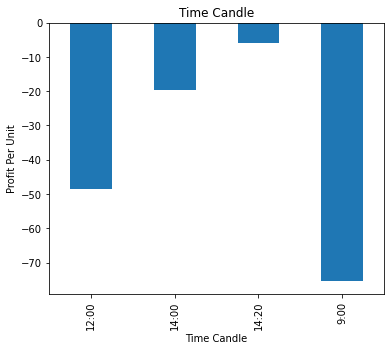

In [7]:
candle_plt = candle_gb.plot(kind='bar', title='Time Candle', ylabel='Profit Per Unit',
         xlabel='Time Candle', figsize=(6, 5))

Notice: 1. the large discrepancy between the time candles, and 2. all results are negative.

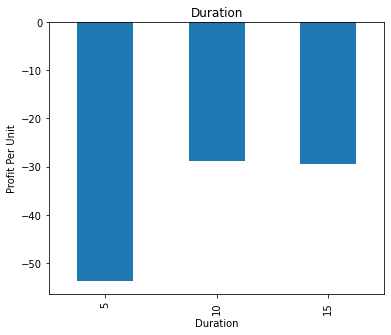

In [8]:


duration_plt = duration_gb.plot(kind='bar', title='Duration', ylabel='Profit Per Unit',
         xlabel='Duration', figsize=(6, 5))

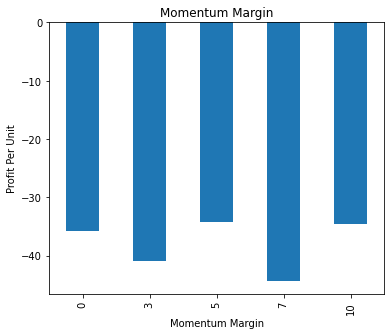

In [9]:
momentum_margin_plt = momentum_margin_gb.plot(kind='bar', title='Momentum Margin', ylabel='Profit Per Unit',
         xlabel='Momentum Margin', figsize=(6, 5))

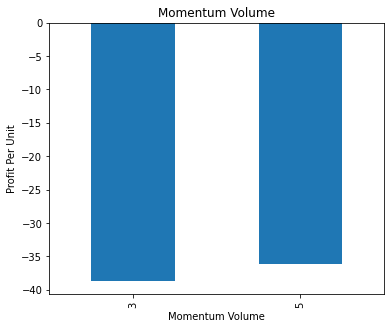

In [10]:
momentum_volume_plt = momentum_volume_gb.plot(kind='bar', title='Momentum Volume', ylabel='Profit Per Unit',
         xlabel='Momentum Volume', figsize=(6, 5))

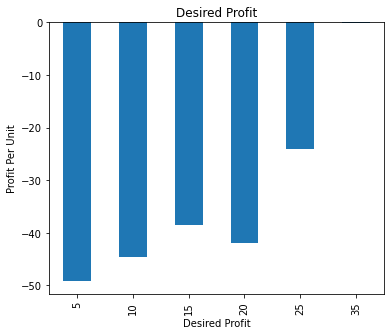

In [11]:
desired_profit_plt = desired_profit_gb.plot(kind='bar', title='Desired Profit', ylabel='Profit Per Unit',
         xlabel='Desired Profit', figsize=(6, 5))

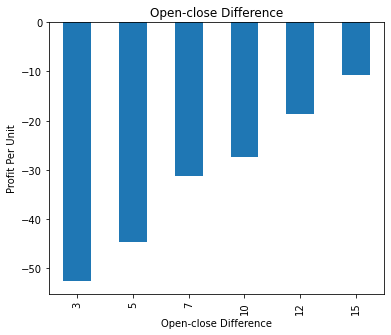

In [12]:
openclosedifference_plt = openclosedifference_gb.plot(kind='bar', title='Open-close Difference', ylabel='Profit Per Unit',
         xlabel='Open-close Difference', figsize=(6, 5))

To me, this indicates that the open-close difference of the candle is strongly correlated with the profitablity of our strategy. We'll check this soon when we examine multiple features at once.

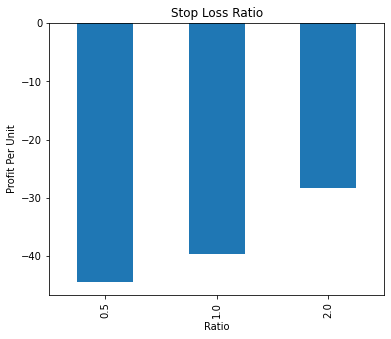

In [13]:
stoplossratio_plt = stoplossratio_gb.plot(kind='bar', title='Stop Loss Ratio', ylabel='Profit Per Unit',
         xlabel='Ratio', figsize=(6, 5))

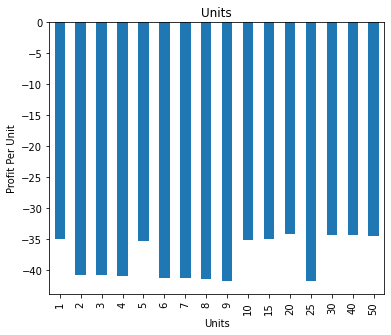

In [14]:
units_plt = units_gb.plot(kind='bar', title='Units', ylabel='Profit Per Unit',
         xlabel='Units', figsize=(6, 5))

In [15]:
candle_duration_gb = strategies.groupby(["Time Candle","Duration"])["Profit Per Unit"].mean()
#duration_gb = strategies.groupby("Duration")["Profit Per Unit"].mean()
#momentum_margin_gb = strategies.groupby("Momentum Margin")["Profit Per Unit"].mean()
#momentum_volume_gb = strategies.groupby("Momentum Volume")["Profit Per Unit"].mean()
#desired_profit_gb = strategies.groupby("Desired Profit")["Profit Per Unit"].mean()
#stoplossratio_gb = strategies.groupby("Stop Loss Ratio")["Profit Per Unit"].mean()
#units_gb = strategies.groupby("Units")["Profit Per Unit"].mean()
#openclosedifference_gb = strategies.groupby("Open-close Difference")["Profit Per Unit"].mean()

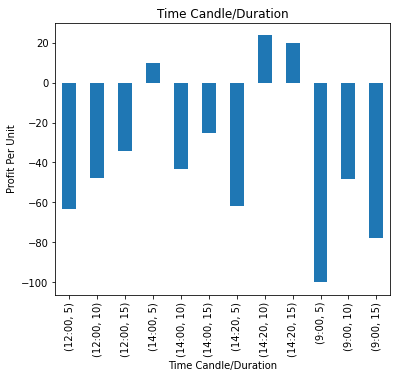

In [16]:
candle_duration_gb = strategies.groupby(["Time Candle","Duration"])["Profit Per Unit"].mean()
candle_duration_plt = candle_duration_gb.plot(kind='bar', title='Time Candle/Duration', ylabel='Profit Per Unit',
         xlabel='Time Candle/Duration', figsize=(6, 5))

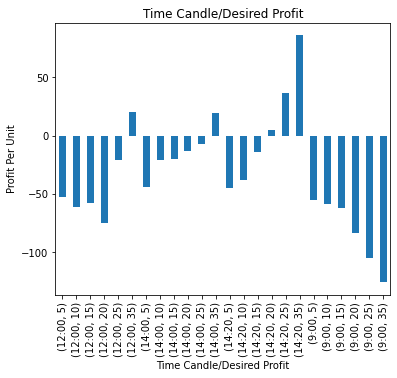

In [17]:
candle_profit_gb = strategies.groupby(["Time Candle","Desired Profit"])["Profit Per Unit"].mean()
candle_profit_plt = candle_profit_gb.plot(kind='bar', title='Time Candle/Desired Profit', ylabel='Profit Per Unit',
         xlabel='Time Candle/Desired Profit', figsize=(6, 5))

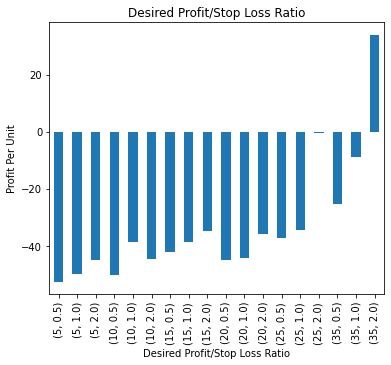

In [18]:
profit_loss_gb = strategies.groupby(["Desired Profit","Stop Loss Ratio"])["Profit Per Unit"].mean()  # .count()
profit_loss_plt = profit_loss_gb.plot(kind='bar', title='Desired Profit/Stop Loss Ratio', ylabel='Profit Per Unit',
         xlabel='Desired Profit/Stop Loss Ratio', figsize=(6, 5))

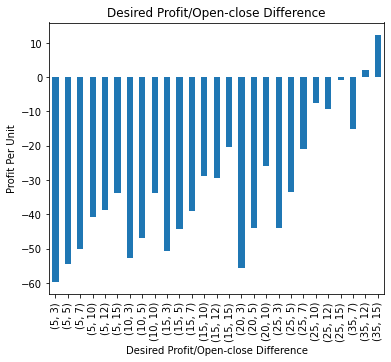

In [19]:
profit_ocd_gb = strategies.groupby(["Desired Profit","Open-close Difference"])["Profit Per Unit"].mean()  # .count()
profit_ocd_plt = profit_ocd_gb.plot(kind='bar', title='Desired Profit/Open-close Difference', ylabel='Profit Per Unit',
         xlabel='Desired Profit/Open-close Difference', figsize=(6, 5))

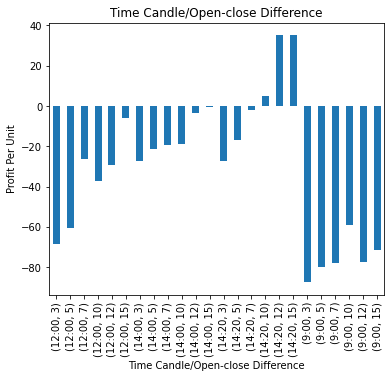

In [20]:
candle_ocd_gb = strategies.groupby(["Time Candle","Open-close Difference"])["Profit Per Unit"].mean()
candle_ocd_plt = candle_ocd_gb.plot(kind='bar', title='Time Candle/Open-close Difference', ylabel='Profit Per Unit',
         xlabel='Time Candle/Open-close Difference', figsize=(6, 5))

#### Current thoughts:

1. The open-close difference still seems to be the strongest indicator. My goal would be to try and back up this claim using statistical analysis (e.g Pearson correlation) and linear regression.
2. More data would be needed at this point to examine things more conclusively.
3. Assuming this data is representative - perhaps worth examining the reverse strategy, since most of the strategies here were losers. E.g small gains in indicator candle > short!

In [21]:
candle_profit_loss_ocd_pivot = strategies.pivot_table('Profit Per Unit',['Time Candle','Desired Profit'],['Stop Loss Ratio', 'Open-close Difference'], aggfunc='mean')
candle_profit_loss_ocd_pivot

Stop Loss Ratio                   0.5                                    \
Open-close Difference              3          5           7          10   
Time Candle Desired Profit                                                
12:00       5              -58.414188 -53.009702  -51.654850 -42.087751   
            10             -52.870196 -47.655199         NaN -37.513384   
            15             -71.246205 -61.886817  -49.815567 -47.790601   
            20             -91.729697 -80.322206         NaN -60.863891   
            25             -72.687385 -59.819355  -46.912720 -35.663596   
            35                    NaN        NaN  -50.235683        NaN   
14:00       5              -59.002051 -56.683428  -55.604144 -44.220804   
            10             -55.011996 -51.593835         NaN -38.256370   
            15             -39.076287 -35.045326  -32.457072 -20.606253   
            20             -17.972334 -13.301229         NaN -10.940136   
            25              -7.704551   0.836462   -3.337674  -4.849697   
            35                    NaN        NaN   18.588657        NaN   
14:20       5              -60.557726 -53.405008  -52.004433 -40.511054   
            10             -58.595328 -51.496283         NaN -39.589205   
            15             -51.483522 -46.171271  -45.697153 -29.737158   
            20             -53.344817 -39.688862         NaN -21.615524   
            25             -49.843063 -35.608755  -37.803854 -20.771220   
            35                    NaN        NaN   33.601759        NaN   
9:00        5              -70.638365 -66.962045  -59.974965 -53.885445   
            10             -65.336720 -60.458732         NaN -46.194574   
            15             -53.901631 -46.564311  -32.236759 -37.494781   
            20             -60.570367 -51.117129         NaN -40.145150   
            25             -81.154850 -69.270502  -51.526273 -50.585115   
            35                    NaN        NaN -119.434826        NaN   

Stop Loss Ratio                                            1.0              \
Open-close Difference               12          15          3           5    
Time Candle Desired Profit                                                   
12:00       5               -38.801817  -31.500347  -57.938588  -53.066675   
            10                     NaN         NaN  -64.407492  -55.622785   
            15              -44.979896  -34.733634  -84.552543  -68.391502   
            20                     NaN         NaN -119.771068  -99.330657   
            25              -47.485544  -31.137512  -84.755086  -77.915165   
            35              -64.490208  -41.688970         NaN         NaN   
14:00       5               -42.987153  -33.604514  -61.246820  -57.960613   
            10                     NaN         NaN  -16.806598  -14.634629   
            15              -17.508194   -9.580440  -15.621557  -13.211584   
            20                     NaN         NaN   -1.363172    3.626852   
            25               -1.243322   -8.813287  -14.340299   -4.174214   
            35               11.657350    0.050579         NaN         NaN   
14:20       5               -37.525382  -37.525382  -54.105064  -46.534373   
            10                     NaN         NaN  -53.759948  -49.786172   
            15              -28.383542  -28.383542  -42.576594  -32.800921   
            20                     NaN         NaN  -31.967624   -2.643844   
            25               -8.839225   -8.839225   29.805075   37.930375   
            35               57.702130   57.702130         NaN         NaN   
9:00        5               -51.154016  -47.974479  -67.319985  -62.255761   
            10                     NaN         NaN  -52.998668  -44.253050   
            15              -36.492616  -31.805984  -70.055632  -57.345094   
            20                     NaN         NaN  -83.385357  -74.632551   
            25          

#### Regression Analysis

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [30]:
strategies = pd.get_dummies(strategies, columns = ['Time Candle', 'Duration'])
X_strategies = strategies.drop(['Total Profit', 'Stop Loss Ratio', 'Profit Per Unit', 'Unnamed: 0'], axis = 1)
Y_strategies = strategies['Profit Per Unit']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_strategies, Y_strategies, random_state = 1, train_size = 0.7)
Xtrain

,Momentum Margin,Momentum Volume,Desired Profit,Stop Loss,Units,Open-close Difference,Time Candle_12:00,Time Candle_14:00,Time Candle_14:20,Time Candle_9:00,Duration_5,Duration_10,Duration_15
566,10,3,25,12.5,5,10,0,0,0,1,1,0,0
86280,3,3,5,10.0,50,3,0,0,1,0,0,0,1
19574,5,3,25,50.0,6,10,0,0,0,1,1,0,0
15987,3,3,25,25.0,30,3,0,0,1,0,0,1,0
76170,3,3,20,20.0,20,3,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,3,3,10,20.0,8,10,0,1,0,0,1,0,0
98047,10,5,25,12.5,30,12,0,1,0,0,1,0,0
5192,3,5,5,2.5,10,10,1,0,0,0,1,0,0
77708,0,3,15,30.0,10,10,0,0,0,1,1,0,0


In [31]:
LR_model = LinearRegression()
LR_model.fit(Xtrain, ytrain)

array([ 4.63257745e-02,  1.33109516e+00,  2.40763006e-01,  7.82051515e-01,
        1.16248074e-02,  3.20047547e+00, -1.11930467e+01,  1.76602088e+01,
        3.12783807e+01, -3.77455428e+01, -1.64517281e+01,  8.39651708e+00,
        8.05521106e+00])

In [41]:
list(strategies.columns).transpose

AttributeError: 'list' object has no attribute 'transpose'

In [43]:
Coef_Table = pd.DataFrame(zip(X_strategies.columns, LR_model.coef_), columns = ['Feature', 'Coefficient'])
Coef_Table

,Feature,Coefficient
0,Momentum Margin,0.046326
1,Momentum Volume,1.331095
2,Desired Profit,0.240763
3,Stop Loss,0.782052
4,Units,0.011625
5,Open-close Difference,3.200475
6,Time Candle_12:00,-11.193047
7,Time Candle_14:00,17.660209
8,Time Candle_14:20,31.278381
9,Time Candle_9:00,-37.745543
